In [28]:
import netCDF4
import os
import csv
import datetime as dt
from netCDF4 import num2date
import netCDF4 as nc
from datetime import date
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
from matplotlib import pyplot as plt

import praw  # Reddit API
import nltk  # for NLP
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SNTA

pd.set_option('max_columns', 300)
pd.set_option('max_rows', 100)

# Import the companies dataframe and isolate the most searched company

In [29]:
df_searched = pd.read_csv('wallstreetbets_2021.csv')
df_searched

,ticker,overall_rank,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,...,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,total
0,GME,1,1325,1084,823,1650,1806,1275,1009,1172,479,893,2578,1486,11569,12878,11984,5152,5664,7499,20145,15494,21162,42276,12960,3299,0,0,135136,267231,196168,84438,76651,237511,137697,79970,51677,28334,13263,7795,15552,18246,13294,7997,6090,4089,2230,2077,4726,5993,19384,11884,7215,5804,16361,13759,41281,74924,51603,735,0,0,21384,19515,15300,13009,5682,3950,23671,24066,42347,23557,17953,4503,3657,18113,18198,14470,15820,21791,3350,3243,12463,23115,23290,19685,16966,2823,3282,9391,11102,10521,9602,1924,2428,1222,8720,7121,7705,8029,9606,2752,1791,9960,8526,10595,7554,14242,2631,994,2264,1378,1215,1496,1439,670,490,4868,3113,3603,2276,1953,670,1251,962,711,1861,3191,1235,969,1056,2375,1356,1124,1821,1314,649,302,1623,5302,1499,674,1378,1010,820,823,5259,7296,4927,2718,...,771,247,101,164,1153,251,205,297,290,118,109,347,284,307,379,255,114,84,965,3193,2616,941,730,190,212,1726,964,645,1803,713,355,267,316,883,2068,1155,418,261,326,420,438,467,1026,695,396,132,432,237,229,222,492,294,197,362,551,333,383,275,237,297,404,270,482,459,159,124,207,463,1245,447,396,369,101,207,392,589,207,180,479,1482,157,209,311,232,279,259,144,86,1301,903,1312,1445,492,301,169,350,577,326,309,207,174,107,217,414,261,202,493,228,230,656,1097,272,146,262,81,312,1039,712,383,276,441,364,148,294,241,1280,1106,793,534,158,832,1125,658,263,848,606,273,344,333,359,351,93,274,359,341,220,528,892,817,2607123
1,AMC,2,73,10,10,9,10,10,13,6,2,4,7,11,10,26,256,20,29,321,435,176,86,1117,146,59,0,0,36933,46637,35495,28175,23456,45521,33606,14436,11277,8721,2143,1327,2379,3904,2297,1068,825,331,214,4

In [30]:
print('The most searched company is', df_searched['ticker'].values[0])

The most searched company is GME


# Import post and comment DataFrames

In [31]:
path_posts = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\downloaded data\summaries\posts\\'
path_comments = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\downloaded data\summaries\comments\\'

In [37]:
df_sub = pd.read_csv(path_posts+'submissions.csv')
df_sub

,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,DateTime
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21
...,...,...,...,...,...,...,...,...,...
7435,um1y9b,https://imgur.com/4oCp800.gif,Me after going all in oil stocks in mid 2020 b...,1,1.00,0,1.652132e+09,[deleted],2022-05-09 21:33:30
7436,um1yb1,https://i.redd.it/9hdug9j4riy81.jpg,THE HOUSING MARKET IS GOING TO ZERO LIKE IN 20...,1,1.00,1,1.652132e+09,[deleted],2022-05-09 21:33:33
7437,um1zbn,https://i.imgur.com/tFcgybb.jpeg,My portfolio after today,1,1.00,0,1.652132e+09,NaN,2022-05-09 21:34:50
7438,um201i,https://i.redd.it/616q1v6griy81.gif,"Me, knowing nothing about investing, going all...",2,1.00,2,1.652132e+09,NaN,2022-05-09 21:35:42


In [49]:
df_com = pd.read_csv(path_comments+'comments.csv')
df_com

,comment_id,comment_parent_id,comment_body,comment_link_id
0,i43gb7l,u04so3,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_u04so3
1,i43gqan,u04so3,![img](emote|t5_2th52|4271),t3_u04so3
2,i43htzd,u04so3,"It’s Rally’s, not Checkers",t3_u04so3
3,i43h3ho,u04so3,How much did Team Pelosi make on Zoom stock du...,t3_u04so3
4,i43k3y5,i43htzd,Sir this is a Wendy's.,t3_u04so3
...,...,...,...,...
476504,i7yzopa,um1yb1,I am a bot from /r/wallstreetbets. You submitt...,t3_um1yb1
476505,i7yzv6d,um201i,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_um201i
476506,i7yzu0m,um201i,I am a bot from /r/wallstreetbets. You submitt...,t3_um201i
476507,i7yzz1z,um20fo,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_um20fo


Drop comments if no comment body:

In [67]:
df_com = df_com[df_com.comment_body != np.nan]
df_com.reset_index(inplace=True)
df_com

# Check the mentions of the company tickers in the headline
First define the number of companies (top for 2021) to be included in the analysis

In [33]:
num_companies = 50 # top num_companies to be included

In [39]:
for index in range(num_companies):
#     print('Running for: ', df_searched['ticker'].values[index])
    df_sub[df_searched['ticker'].values[index]] = False
    for i in range(len(df_sub)):
        if df_searched['ticker'].values[index] in df_sub['title'][i]:
            df_sub[df_searched['ticker'].values[index]][i] = True
df_sub

Running for:  GME
Running for:  AMC
Running for:  BB
Running for:  TSLA
Running for:  PLTR


C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_95680/2013493800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[df_searched['ticker'].values[index]][i] = True


Running for:  SPY
Running for:  NOK
Running for:  CLOV
Running for:  RKT
Running for:  WISH
Running for:  AAPL
Running for:  AMD
Running for:  SNDL
Running for:  SLV
Running for:  NIO
Running for:  UWMC
Running for:  TLRY
Running for:  MVIS
Running for:  BABA
Running for:  SPCE
Running for:  AMZN
Running for:  CRSR
Running for:  SOFI
Running for:  NVDA
Running for:  CLNE
Running for:  F
Running for:  WKHS
Running for:  APHA
Running for:  CLF
Running for:  FB
Running for:  QQQ
Running for:  MSFT
Running for:  VIX
Running for:  RIDE
Running for:  NFLX
Running for:  MNMD
Running for:  SDC
Running for:  COIN
Running for:  VW
Running for:  ICLN
Running for:  DKNG
Running for:  RBLX
Running for:  GOEV
Running for:  NAKD
Running for:  VIAC
Running for:  GM
Running for:  PLUG
Running for:  ARK
Running for:  LCID
Running for:  BBBY


,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,DateTime,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,um1y9b,https://imgur.com/4oCp800.gif,Me after going all in oil stocks in mid 2020 b...,1,1.00,0,1.652132e+09,[deleted],2022-05-09 21:33:30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7436,um1yb1,https://i.redd.it/9hdug9j4riy81.jpg,THE HOUSING MARKET IS GOING TO ZERO LIKE IN 20...,1,1.00,1,1.652132e+09,[deleted],2022-05-09 21:33:33,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
7437,um1zbn,https://i.imgur.com/tFcgybb.jpeg,My portfolio after today,1,1.00,0,1.652132e+09,NaN,2022-05-09 21:34:50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7438,um2

Let's check the percentage of mentions of the aforementioned companies in the headlines:

In [42]:
for index in range(num_companies):
    per = df_sub[df_searched['ticker'].values[index]].sum() * 100 / len(df_sub)
    print(df_searched['ticker'].values[index], f'is mentioned in {per:.2f}% of the headlines.')
    print(' ')

GME is mentioned in 1.13% of the headlines.
 
AMC is mentioned in 0.75% of the headlines.
 
BB is mentioned in 0.56% of the headlines.
 
TSLA is mentioned in 0.55% of the headlines.
 
PLTR is mentioned in 0.20% of the headlines.
 
SPY is mentioned in 1.14% of the headlines.
 
NOK is mentioned in 0.03% of the headlines.
 
CLOV is mentioned in 0.05% of the headlines.
 
RKT is mentioned in 0.04% of the headlines.
 
WISH is mentioned in 0.16% of the headlines.
 
AAPL is mentioned in 0.08% of the headlines.
 
AMD is mentioned in 0.42% of the headlines.
 
SNDL is mentioned in 0.08% of the headlines.
 
SLV is mentioned in 0.01% of the headlines.
 
NIO is mentioned in 0.16% of the headlines.
 
UWMC is mentioned in 0.03% of the headlines.
 
TLRY is mentioned in 0.05% of the headlines.
 
MVIS is mentioned in 0.00% of the headlines.
 
BABA is mentioned in 0.09% of the headlines.
 
SPCE is mentioned in 0.15% of the headlines.
 
AMZN is mentioned in 0.27% of the headlines.
 
CRSR is mentioned in 0.

Same process for comments:

In [102]:
for index in range(num_companies):
    print('Running for: ', df_searched['ticker'].values[index])
    df_com[df_searched['ticker'].values[index]] = False
    for i in range(len(df_com)):
        if df_com['comment_body'].iloc[i] is not np.nan:
            if df_searched['ticker'].values[index] in df_com['comment_body'][i]:
                df_com[df_searched['ticker'].values[index]][i] = True
df_com

Running for:  GME


C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_95680/1519771354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com[df_searched['ticker'].values[index]][i] = True


Running for:  AMC
Running for:  BB
Running for:  TSLA
Running for:  PLTR
Running for:  SPY
Running for:  NOK
Running for:  CLOV
Running for:  RKT
Running for:  WISH
Running for:  AAPL
Running for:  AMD
Running for:  SNDL
Running for:  SLV
Running for:  NIO
Running for:  UWMC
Running for:  TLRY
Running for:  MVIS
Running for:  BABA
Running for:  SPCE
Running for:  AMZN
Running for:  CRSR
Running for:  SOFI
Running for:  NVDA
Running for:  CLNE
Running for:  F
Running for:  WKHS
Running for:  APHA
Running for:  CLF
Running for:  FB
Running for:  QQQ
Running for:  MSFT
Running for:  VIX
Running for:  RIDE
Running for:  NFLX
Running for:  MNMD
Running for:  SDC
Running for:  COIN
Running for:  VW
Running for:  ICLN
Running for:  DKNG
Running for:  RBLX
Running for:  GOEV
Running for:  NAKD
Running for:  VIAC
Running for:  GM
Running for:  PLUG
Running for:  ARK
Running for:  LCID
Running for:  BBBY


,index,comment_id,comment_parent_id,comment_body,comment_link_id,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance,compound,NLTK_label
0,0,i43gb7l,u04so3,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.5362,Negative
1,1,i43gqan,u04so3,![img](emote|t5_2th52|4271),t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
2,2,i43htzd,u04so3,"It’s Rally’s, not Checkers",t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
3,3,i43h3ho,u04so3,How much did Team Pelosi make on Zoom stock du...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
4,4,i43k3y5,i43htzd,Sir this is a Wendy's.,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476504,476504,i7yzopa,um1yb1,I am a bot from /r/wallstreetbets. You submitt...,t3_um1yb1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
476505,476505,i7yzv6d,um201i,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_um201i,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.5362,Negative
476506,476506,i7yzu0m,um201i,I am a bot from /r/wallstreetbets. You submitt...,t3_um201i,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
476507,476507,i7yzz1z,um20fo,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t

In [103]:
for index in range(num_companies):
    per = df_com[df_searched['ticker'].values[index]].sum() * 100 / len(df_com)
    print(df_searched['ticker'].values[index], f'is mentioned in {per:.2f}% of the comments.')
    print(' ')

GME is mentioned in 0.56% of the comments.
 
AMC is mentioned in 0.21% of the comments.
 
BB is mentioned in 0.10% of the comments.
 
TSLA is mentioned in 0.60% of the comments.
 
PLTR is mentioned in 0.16% of the comments.
 
SPY is mentioned in 1.44% of the comments.
 
NOK is mentioned in 0.01% of the comments.
 
CLOV is mentioned in 0.03% of the comments.
 
RKT is mentioned in 0.01% of the comments.
 
WISH is mentioned in 0.07% of the comments.
 
AAPL is mentioned in 0.13% of the comments.
 
AMD is mentioned in 0.55% of the comments.
 
SNDL is mentioned in 0.01% of the comments.
 
SLV is mentioned in 0.01% of the comments.
 
NIO is mentioned in 0.06% of the comments.
 
UWMC is mentioned in 0.00% of the comments.
 
TLRY is mentioned in 0.03% of the comments.
 
MVIS is mentioned in 0.00% of the comments.
 
BABA is mentioned in 0.04% of the comments.
 
SPCE is mentioned in 0.02% of the comments.
 
AMZN is mentioned in 0.14% of the comments.
 
CRSR is mentioned in 0.02% of the comments.


### Next feature to be generated is to measure the number of ticker mentions in the comment section  for each post 

In [108]:
for index in range(num_companies):  # set column initially to 0
    df_sub[df_searched['ticker'].values[index]+'_comments'] = 0

for i in range(len(df_sub)):
    print('Running row: ', i)
    temp_df = pd.DataFrame()
    temp_df = df_com[ df_com['comment_parent_id'] == df_sub['id'].iloc[i] ]
    
    for index in range(num_companies):
        if len(temp_df) > 0:
            df_sub[df_searched['ticker'].values[index]+'_comments'].iloc[i] = temp_df[df_searched['ticker'].values[index]].sum()

Running row:  0
Running row:  1
Running row:  2
Running row:  3
Running row:  4
Running row:  5


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Running row:  6
Running row:  7
Running row:  8
Running row:  9
Running row:  10
Running row:  11
Running row:  12
Running row:  13
Running row:  14
Running row:  15
Running row:  16
Running row:  17
Running row:  18
Running row:  19
Running row:  20
Running row:  21
Running row:  22
Running row:  23
Running row:  24
Running row:  25
Running row:  26
Running row:  27
Running row:  28
Running row:  29
Running row:  30
Running row:  31
Running row:  32
Running row:  33
Running row:  34
Running row:  35
Running row:  36
Running row:  37
Running row:  38
Running row:  39
Running row:  40
Running row:  41
Running row:  42
Running row:  43
Running row:  44
Running row:  45
Running row:  46
Running row:  47
Running row:  48
Running row:  49
Running row:  50
Running row:  51
Running row:  52
Running row:  53
Running row:  54
Running row:  55
Running row:  56
Running row:  57
Running row:  58
Running row:  59
Running row:  60
Running row:  61
Running row:  62
Running row:  63
Running row:  64
R

Running row:  469
Running row:  470
Running row:  471
Running row:  472
Running row:  473
Running row:  474
Running row:  475
Running row:  476
Running row:  477
Running row:  478
Running row:  479
Running row:  480
Running row:  481
Running row:  482
Running row:  483
Running row:  484
Running row:  485
Running row:  486
Running row:  487
Running row:  488
Running row:  489
Running row:  490
Running row:  491
Running row:  492
Running row:  493
Running row:  494
Running row:  495
Running row:  496
Running row:  497
Running row:  498
Running row:  499
Running row:  500
Running row:  501
Running row:  502
Running row:  503
Running row:  504
Running row:  505
Running row:  506
Running row:  507
Running row:  508
Running row:  509
Running row:  510
Running row:  511
Running row:  512
Running row:  513
Running row:  514
Running row:  515
Running row:  516
Running row:  517
Running row:  518
Running row:  519
Running row:  520
Running row:  521
Running row:  522
Running row:  523
Running ro

Running row:  929
Running row:  930
Running row:  931
Running row:  932
Running row:  933
Running row:  934
Running row:  935
Running row:  936
Running row:  937
Running row:  938
Running row:  939
Running row:  940
Running row:  941
Running row:  942
Running row:  943
Running row:  944
Running row:  945
Running row:  946
Running row:  947
Running row:  948
Running row:  949
Running row:  950
Running row:  951
Running row:  952
Running row:  953
Running row:  954
Running row:  955
Running row:  956
Running row:  957
Running row:  958
Running row:  959
Running row:  960
Running row:  961
Running row:  962
Running row:  963
Running row:  964
Running row:  965
Running row:  966
Running row:  967
Running row:  968
Running row:  969
Running row:  970
Running row:  971
Running row:  972
Running row:  973
Running row:  974
Running row:  975
Running row:  976
Running row:  977
Running row:  978
Running row:  979
Running row:  980
Running row:  981
Running row:  982
Running row:  983
Running ro

Running row:  1366
Running row:  1367
Running row:  1368
Running row:  1369
Running row:  1370
Running row:  1371
Running row:  1372
Running row:  1373
Running row:  1374
Running row:  1375
Running row:  1376
Running row:  1377
Running row:  1378
Running row:  1379
Running row:  1380
Running row:  1381
Running row:  1382
Running row:  1383
Running row:  1384
Running row:  1385
Running row:  1386
Running row:  1387
Running row:  1388
Running row:  1389
Running row:  1390
Running row:  1391
Running row:  1392
Running row:  1393
Running row:  1394
Running row:  1395
Running row:  1396
Running row:  1397
Running row:  1398
Running row:  1399
Running row:  1400
Running row:  1401
Running row:  1402
Running row:  1403
Running row:  1404
Running row:  1405
Running row:  1406
Running row:  1407
Running row:  1408
Running row:  1409
Running row:  1410
Running row:  1411
Running row:  1412
Running row:  1413
Running row:  1414
Running row:  1415
Running row:  1416
Running row:  1417
Running row:

Running row:  1802
Running row:  1803
Running row:  1804
Running row:  1805
Running row:  1806
Running row:  1807
Running row:  1808
Running row:  1809
Running row:  1810
Running row:  1811
Running row:  1812
Running row:  1813
Running row:  1814
Running row:  1815
Running row:  1816
Running row:  1817
Running row:  1818
Running row:  1819
Running row:  1820
Running row:  1821
Running row:  1822
Running row:  1823
Running row:  1824
Running row:  1825
Running row:  1826
Running row:  1827
Running row:  1828
Running row:  1829
Running row:  1830
Running row:  1831
Running row:  1832
Running row:  1833
Running row:  1834
Running row:  1835
Running row:  1836
Running row:  1837
Running row:  1838
Running row:  1839
Running row:  1840
Running row:  1841
Running row:  1842
Running row:  1843
Running row:  1844
Running row:  1845
Running row:  1846
Running row:  1847
Running row:  1848
Running row:  1849
Running row:  1850
Running row:  1851
Running row:  1852
Running row:  1853
Running row:

Running row:  2237
Running row:  2238
Running row:  2239
Running row:  2240
Running row:  2241
Running row:  2242
Running row:  2243
Running row:  2244
Running row:  2245
Running row:  2246
Running row:  2247
Running row:  2248
Running row:  2249
Running row:  2250
Running row:  2251
Running row:  2252
Running row:  2253
Running row:  2254
Running row:  2255
Running row:  2256
Running row:  2257
Running row:  2258
Running row:  2259
Running row:  2260
Running row:  2261
Running row:  2262
Running row:  2263
Running row:  2264
Running row:  2265
Running row:  2266
Running row:  2267
Running row:  2268
Running row:  2269
Running row:  2270
Running row:  2271
Running row:  2272
Running row:  2273
Running row:  2274
Running row:  2275
Running row:  2276
Running row:  2277
Running row:  2278
Running row:  2279
Running row:  2280
Running row:  2281
Running row:  2282
Running row:  2283
Running row:  2284
Running row:  2285
Running row:  2286
Running row:  2287
Running row:  2288
Running row:

Running row:  2673
Running row:  2674
Running row:  2675
Running row:  2676
Running row:  2677
Running row:  2678
Running row:  2679
Running row:  2680
Running row:  2681
Running row:  2682
Running row:  2683
Running row:  2684
Running row:  2685
Running row:  2686
Running row:  2687
Running row:  2688
Running row:  2689
Running row:  2690
Running row:  2691
Running row:  2692
Running row:  2693
Running row:  2694
Running row:  2695
Running row:  2696
Running row:  2697
Running row:  2698
Running row:  2699
Running row:  2700
Running row:  2701
Running row:  2702
Running row:  2703
Running row:  2704
Running row:  2705
Running row:  2706
Running row:  2707
Running row:  2708
Running row:  2709
Running row:  2710
Running row:  2711
Running row:  2712
Running row:  2713
Running row:  2714
Running row:  2715
Running row:  2716
Running row:  2717
Running row:  2718
Running row:  2719
Running row:  2720
Running row:  2721
Running row:  2722
Running row:  2723
Running row:  2724
Running row:

Running row:  3109
Running row:  3110
Running row:  3111
Running row:  3112
Running row:  3113
Running row:  3114
Running row:  3115
Running row:  3116
Running row:  3117
Running row:  3118
Running row:  3119
Running row:  3120
Running row:  3121
Running row:  3122
Running row:  3123
Running row:  3124
Running row:  3125
Running row:  3126
Running row:  3127
Running row:  3128
Running row:  3129
Running row:  3130
Running row:  3131
Running row:  3132
Running row:  3133
Running row:  3134
Running row:  3135
Running row:  3136
Running row:  3137
Running row:  3138
Running row:  3139
Running row:  3140
Running row:  3141
Running row:  3142
Running row:  3143
Running row:  3144
Running row:  3145
Running row:  3146
Running row:  3147
Running row:  3148
Running row:  3149
Running row:  3150
Running row:  3151
Running row:  3152
Running row:  3153
Running row:  3154
Running row:  3155
Running row:  3156
Running row:  3157
Running row:  3158
Running row:  3159
Running row:  3160
Running row:

Running row:  3544
Running row:  3545
Running row:  3546
Running row:  3547
Running row:  3548
Running row:  3549
Running row:  3550
Running row:  3551
Running row:  3552
Running row:  3553
Running row:  3554
Running row:  3555
Running row:  3556
Running row:  3557
Running row:  3558
Running row:  3559
Running row:  3560
Running row:  3561
Running row:  3562
Running row:  3563
Running row:  3564
Running row:  3565
Running row:  3566
Running row:  3567
Running row:  3568
Running row:  3569
Running row:  3570
Running row:  3571
Running row:  3572
Running row:  3573
Running row:  3574
Running row:  3575
Running row:  3576
Running row:  3577
Running row:  3578
Running row:  3579
Running row:  3580
Running row:  3581
Running row:  3582
Running row:  3583
Running row:  3584
Running row:  3585
Running row:  3586
Running row:  3587
Running row:  3588
Running row:  3589
Running row:  3590
Running row:  3591
Running row:  3592
Running row:  3593
Running row:  3594
Running row:  3595
Running row:

Running row:  3978
Running row:  3979
Running row:  3980
Running row:  3981
Running row:  3982
Running row:  3983
Running row:  3984
Running row:  3985
Running row:  3986
Running row:  3987
Running row:  3988
Running row:  3989
Running row:  3990
Running row:  3991
Running row:  3992
Running row:  3993
Running row:  3994
Running row:  3995
Running row:  3996
Running row:  3997
Running row:  3998
Running row:  3999
Running row:  4000
Running row:  4001
Running row:  4002
Running row:  4003
Running row:  4004
Running row:  4005
Running row:  4006
Running row:  4007
Running row:  4008
Running row:  4009
Running row:  4010
Running row:  4011
Running row:  4012
Running row:  4013
Running row:  4014
Running row:  4015
Running row:  4016
Running row:  4017
Running row:  4018
Running row:  4019
Running row:  4020
Running row:  4021
Running row:  4022
Running row:  4023
Running row:  4024
Running row:  4025
Running row:  4026
Running row:  4027
Running row:  4028
Running row:  4029
Running row:

Running row:  4414
Running row:  4415
Running row:  4416
Running row:  4417
Running row:  4418
Running row:  4419
Running row:  4420
Running row:  4421
Running row:  4422
Running row:  4423
Running row:  4424
Running row:  4425
Running row:  4426
Running row:  4427
Running row:  4428
Running row:  4429
Running row:  4430
Running row:  4431
Running row:  4432
Running row:  4433
Running row:  4434
Running row:  4435
Running row:  4436
Running row:  4437
Running row:  4438
Running row:  4439
Running row:  4440
Running row:  4441
Running row:  4442
Running row:  4443
Running row:  4444
Running row:  4445
Running row:  4446
Running row:  4447
Running row:  4448
Running row:  4449
Running row:  4450
Running row:  4451
Running row:  4452
Running row:  4453
Running row:  4454
Running row:  4455
Running row:  4456
Running row:  4457
Running row:  4458
Running row:  4459
Running row:  4460
Running row:  4461
Running row:  4462
Running row:  4463
Running row:  4464
Running row:  4465
Running row:

Running row:  4849
Running row:  4850
Running row:  4851
Running row:  4852
Running row:  4853
Running row:  4854
Running row:  4855
Running row:  4856
Running row:  4857
Running row:  4858
Running row:  4859
Running row:  4860
Running row:  4861
Running row:  4862
Running row:  4863
Running row:  4864
Running row:  4865
Running row:  4866
Running row:  4867
Running row:  4868
Running row:  4869
Running row:  4870
Running row:  4871
Running row:  4872
Running row:  4873
Running row:  4874
Running row:  4875
Running row:  4876
Running row:  4877
Running row:  4878
Running row:  4879
Running row:  4880
Running row:  4881
Running row:  4882
Running row:  4883
Running row:  4884
Running row:  4885
Running row:  4886
Running row:  4887
Running row:  4888
Running row:  4889
Running row:  4890
Running row:  4891
Running row:  4892
Running row:  4893
Running row:  4894
Running row:  4895
Running row:  4896
Running row:  4897
Running row:  4898
Running row:  4899
Running row:  4900
Running row:

Running row:  5281
Running row:  5282
Running row:  5283
Running row:  5284
Running row:  5285
Running row:  5286
Running row:  5287
Running row:  5288
Running row:  5289
Running row:  5290
Running row:  5291
Running row:  5292
Running row:  5293
Running row:  5294
Running row:  5295
Running row:  5296
Running row:  5297
Running row:  5298
Running row:  5299
Running row:  5300
Running row:  5301
Running row:  5302
Running row:  5303
Running row:  5304
Running row:  5305
Running row:  5306
Running row:  5307
Running row:  5308
Running row:  5309
Running row:  5310
Running row:  5311
Running row:  5312
Running row:  5313
Running row:  5314
Running row:  5315
Running row:  5316
Running row:  5317
Running row:  5318
Running row:  5319
Running row:  5320
Running row:  5321
Running row:  5322
Running row:  5323
Running row:  5324
Running row:  5325
Running row:  5326
Running row:  5327
Running row:  5328
Running row:  5329
Running row:  5330
Running row:  5331
Running row:  5332
Running row:

Running row:  5713
Running row:  5714
Running row:  5715
Running row:  5716
Running row:  5717
Running row:  5718
Running row:  5719
Running row:  5720
Running row:  5721
Running row:  5722
Running row:  5723
Running row:  5724
Running row:  5725
Running row:  5726
Running row:  5727
Running row:  5728
Running row:  5729
Running row:  5730
Running row:  5731
Running row:  5732
Running row:  5733
Running row:  5734
Running row:  5735
Running row:  5736
Running row:  5737
Running row:  5738
Running row:  5739
Running row:  5740
Running row:  5741
Running row:  5742
Running row:  5743
Running row:  5744
Running row:  5745
Running row:  5746
Running row:  5747
Running row:  5748
Running row:  5749
Running row:  5750
Running row:  5751
Running row:  5752
Running row:  5753
Running row:  5754
Running row:  5755
Running row:  5756
Running row:  5757
Running row:  5758
Running row:  5759
Running row:  5760
Running row:  5761
Running row:  5762
Running row:  5763
Running row:  5764
Running row:

Running row:  6146
Running row:  6147
Running row:  6148
Running row:  6149
Running row:  6150
Running row:  6151
Running row:  6152
Running row:  6153
Running row:  6154
Running row:  6155
Running row:  6156
Running row:  6157
Running row:  6158
Running row:  6159
Running row:  6160
Running row:  6161
Running row:  6162
Running row:  6163
Running row:  6164
Running row:  6165
Running row:  6166
Running row:  6167
Running row:  6168
Running row:  6169
Running row:  6170
Running row:  6171
Running row:  6172
Running row:  6173
Running row:  6174
Running row:  6175
Running row:  6176
Running row:  6177
Running row:  6178
Running row:  6179
Running row:  6180
Running row:  6181
Running row:  6182
Running row:  6183
Running row:  6184
Running row:  6185
Running row:  6186
Running row:  6187
Running row:  6188
Running row:  6189
Running row:  6190
Running row:  6191
Running row:  6192
Running row:  6193
Running row:  6194
Running row:  6195
Running row:  6196
Running row:  6197
Running row:

Running row:  6582
Running row:  6583
Running row:  6584
Running row:  6585
Running row:  6586
Running row:  6587
Running row:  6588
Running row:  6589
Running row:  6590
Running row:  6591
Running row:  6592
Running row:  6593
Running row:  6594
Running row:  6595
Running row:  6596
Running row:  6597
Running row:  6598
Running row:  6599
Running row:  6600
Running row:  6601
Running row:  6602
Running row:  6603
Running row:  6604
Running row:  6605
Running row:  6606
Running row:  6607
Running row:  6608
Running row:  6609
Running row:  6610
Running row:  6611
Running row:  6612
Running row:  6613
Running row:  6614
Running row:  6615
Running row:  6616
Running row:  6617
Running row:  6618
Running row:  6619
Running row:  6620
Running row:  6621
Running row:  6622
Running row:  6623
Running row:  6624
Running row:  6625
Running row:  6626
Running row:  6627
Running row:  6628
Running row:  6629
Running row:  6630
Running row:  6631
Running row:  6632
Running row:  6633
Running row:

Running row:  7018
Running row:  7019
Running row:  7020
Running row:  7021
Running row:  7022
Running row:  7023
Running row:  7024
Running row:  7025
Running row:  7026
Running row:  7027
Running row:  7028
Running row:  7029
Running row:  7030
Running row:  7031
Running row:  7032
Running row:  7033
Running row:  7034
Running row:  7035
Running row:  7036
Running row:  7037
Running row:  7038
Running row:  7039
Running row:  7040
Running row:  7041
Running row:  7042
Running row:  7043
Running row:  7044
Running row:  7045
Running row:  7046
Running row:  7047
Running row:  7048
Running row:  7049
Running row:  7050
Running row:  7051
Running row:  7052
Running row:  7053
Running row:  7054
Running row:  7055
Running row:  7056
Running row:  7057
Running row:  7058
Running row:  7059
Running row:  7060
Running row:  7061
Running row:  7062
Running row:  7063
Running row:  7064
Running row:  7065
Running row:  7066
Running row:  7067
Running row:  7068
Running row:  7069
Running row:

In [110]:
df_sub

,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,DateTime,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance,compound,label,NLTK_label,GME_comments,AMC_comments,BB_comments,TSLA_comments,PLTR_comments,SPY_comments,NOK_comments,CLOV_comments,RKT_comments,WISH_comments,AAPL_comments,AMD_comments,SNDL_comments,SLV_comments,NIO_comments,UWMC_comments,TLRY_comments,MVIS_comments,BABA_comments,SPCE_comments,AMZN_comments,CRSR_comments,SOFI_comments,NVDA_comments,CLNE_comments,F_comments,WKHS_comments,APHA_comments,CLF_comments,FB_comments,QQQ_comments,MSFT_comments,VIX_comments,RIDE_comments,NFLX_comments,MNMD_comments,SDC_comments,COIN_comments,VW_comments,ICLN_comments,DKNG_comments,RBLX_comments,GOEV_comments,NAKD_comments,VIAC_comments,GM_comments,PLUG_comments,ARK_comments,LCID_comments,BBBY_comments
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.3400,Positive,Positive,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [111]:
for index in range(num_companies):
    inst = df_sub[df_searched['ticker'].values[index]+'_comments'].sum()
    print(df_searched['ticker'].values[index], f'is mentioned in {inst:.0f} comments in total.')
    print(' ')

GME is mentioned in 1475 comments in total.
 
AMC is mentioned in 578 comments in total.
 
BB is mentioned in 333 comments in total.
 
TSLA is mentioned in 2008 comments in total.
 
PLTR is mentioned in 579 comments in total.
 
SPY is mentioned in 5274 comments in total.
 
NOK is mentioned in 25 comments in total.
 
CLOV is mentioned in 110 comments in total.
 
RKT is mentioned in 40 comments in total.
 
WISH is mentioned in 210 comments in total.
 
AAPL is mentioned in 402 comments in total.
 
AMD is mentioned in 2033 comments in total.
 
SNDL is mentioned in 42 comments in total.
 
SLV is mentioned in 16 comments in total.
 
NIO is mentioned in 219 comments in total.
 
UWMC is mentioned in 15 comments in total.
 
TLRY is mentioned in 99 comments in total.
 
MVIS is mentioned in 2 comments in total.
 
BABA is mentioned in 134 comments in total.
 
SPCE is mentioned in 57 comments in total.
 
AMZN is mentioned in 454 comments in total.
 
CRSR is mentioned in 69 comments in total.
 
SOFI

# Check the key word mentions
First define the list of keywords of interest to be assessed

In [44]:
bearish = ['put', 'buy']
bullish = ['call', 'sell']
keywords = bearish + bullish
keywords  # bearish and bullish keywords

['put', 'buy', 'call', 'sell']

In [47]:
for word in keywords:  # check the instances of keywords
    df_sub[word+'_instance'] = False
    for i in range(len(df_sub)):
            if ( word in df_sub['title'][i] ) | ( word+'s' in df_sub['title'][i] ):
                df_sub[word+'_instance'][i] = True
df_sub

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_95680/1042193715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[word+'_instance'][i] = True


,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,DateTime,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,um1y9b,https://imgur.com/4oCp800.gif,Me after going all in oil stocks in mid 2020 b...,1,1.00,0,1.652132e+09,[deleted],2022-05-09 21:33:30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7436,um1yb1,https://i.redd.it/9hdug9j4riy81.jpg,THE HOUSING MARKET IS GOING TO ZERO LIKE IN 20...,1,1.00,1,1.652132e+09,[deleted],2022-05-09 21:33:33,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7437,um1zbn,https://i.imgur.com/tFcgybb.jpeg,My portfolio after today,1,1.00,0,1.652132e+09,NaN,2022-05-09 21:34:50,False,False,False,False,False,False,False,False,False,False,False,Fals

In [52]:
for word in keywords:
    per = df_sub[word+'_instance'].sum() * 100 / len(df_sub)
    print(f'Keyword \033[1m{word}\033[0m is mentioned in {per:.2f}% of the headlines.')
    print(' ')

Keyword put is mentioned in 2.26% of the headlines.
 
Keyword buy is mentioned in 3.84% of the headlines.
 
Keyword call is mentioned in 2.84% of the headlines.
 
Keyword sell is mentioned in 1.47% of the headlines.
 


Same process for comments:

In [68]:
for word in keywords:  # check the instances of keywords
    df_com[word+'_instance'] = False
    for i in range(len(df_com)):
        if df_com['comment_body'].iloc[i] is not np.nan:
            if ( word in df_com['comment_body'][i] ) | ( word+'s' in df_com['comment_body'][i] ):
                df_com[word+'_instance'][i] = True
df_com

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_95680/1034549084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com[word+'_instance'][i] = True


,index,comment_id,comment_parent_id,comment_body,comment_link_id,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance
0,0,i43gb7l,u04so3,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,i43gqan,u04so3,![img](emote|t5_2th52|4271),t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,i43htzd,u04so3,"It’s Rally’s, not Checkers",t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,i43h3ho,u04so3,How much did Team Pelosi make on Zoom stock du...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,i43k3y5,i43htzd,Sir this is a Wendy's.,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476504,476504,i7yzopa,um1yb1,I am a bot from /r/wallstreetbets. You submitt...,t3_um1yb1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476505,476505,i7yzv6d,um201i,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_um201i,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476506,476506,i7yzu0m,um201i,I am a bot from /r/wallstreetbets. You submitt...,t3_um201i,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476507,476507,i7yzz1z,um20fo,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_um20fo,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [69]:
for word in keywords:
    per = df_com[word+'_instance'].sum() * 100 / len(df_com)
    print(f'Keyword \033[1m{word}\033[0m is mentioned in {per:.2f}% of the comments.')
    print(' ')

Keyword put is mentioned in 3.94% of the comments.
 
Keyword buy is mentioned in 4.25% of the comments.
 
Keyword call is mentioned in 5.56% of the comments.
 
Keyword sell is mentioned in 2.14% of the comments.
 


### Measure the number of keyword mentions in the comment section for each post 

In [113]:
for word in keywords:  # set initial collumns to 0
    df_sub[word+'_comments'] = 0

for i in range(len(df_sub)):
    print('Running row: ', i)
    temp_df = pd.DataFrame()
    temp_df = df_com[ df_com['comment_parent_id'] == df_sub['id'].iloc[i] ]
    
    for word in keywords:
        if len(temp_df) > 0:
            df_sub[word+'_comments'].iloc[i] = temp_df[word+'_instance'].sum()  

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_95680/3525359194.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sub[word+'_comments'] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Running row:  0
Running row:  1
Running row:  2
Running row:  3
Running row:  4
Running row:  5
Running row:  6
Running row:  7
Running row:  8
Running row:  9
Running row:  10
Running row:  11
Running row:  12
Running row:  13
Running row:  14
Running row:  15
Running row:  16
Running row:  17
Running row:  18
Running row:  19
Running row:  20
Running row:  21
Running row:  22
Running row:  23
Running row:  24
Running row:  25
Running row:  26
Running row:  27
Running row:  28
Running row:  29
Running row:  30
Running row:  31
Running row:  32
Running row:  33
Running row:  34
Running row:  35
Running row:  36
Running row:  37
Running row:  38
Running row:  39
Running row:  40
Running row:  41
Running row:  42
Running row:  43
Running row:  44
Running row:  45
Running row:  46
Running row:  47
Running row:  48
Running row:  49
Running row:  50
Running row:  51
Running row:  52
Running row:  53
Running row:  54
Running row:  55
Running row:  56
Running row:  57
Running row:  58
Running

Running row:  468
Running row:  469
Running row:  470
Running row:  471
Running row:  472
Running row:  473
Running row:  474
Running row:  475
Running row:  476
Running row:  477
Running row:  478
Running row:  479
Running row:  480
Running row:  481
Running row:  482
Running row:  483
Running row:  484
Running row:  485
Running row:  486
Running row:  487
Running row:  488
Running row:  489
Running row:  490
Running row:  491
Running row:  492
Running row:  493
Running row:  494
Running row:  495
Running row:  496
Running row:  497
Running row:  498
Running row:  499
Running row:  500
Running row:  501
Running row:  502
Running row:  503
Running row:  504
Running row:  505
Running row:  506
Running row:  507
Running row:  508
Running row:  509
Running row:  510
Running row:  511
Running row:  512
Running row:  513
Running row:  514
Running row:  515
Running row:  516
Running row:  517
Running row:  518
Running row:  519
Running row:  520
Running row:  521
Running row:  522
Running ro

Running row:  930
Running row:  931
Running row:  932
Running row:  933
Running row:  934
Running row:  935
Running row:  936
Running row:  937
Running row:  938
Running row:  939
Running row:  940
Running row:  941
Running row:  942
Running row:  943
Running row:  944
Running row:  945
Running row:  946
Running row:  947
Running row:  948
Running row:  949
Running row:  950
Running row:  951
Running row:  952
Running row:  953
Running row:  954
Running row:  955
Running row:  956
Running row:  957
Running row:  958
Running row:  959
Running row:  960
Running row:  961
Running row:  962
Running row:  963
Running row:  964
Running row:  965
Running row:  966
Running row:  967
Running row:  968
Running row:  969
Running row:  970
Running row:  971
Running row:  972
Running row:  973
Running row:  974
Running row:  975
Running row:  976
Running row:  977
Running row:  978
Running row:  979
Running row:  980
Running row:  981
Running row:  982
Running row:  983
Running row:  984
Running ro

Running row:  1373
Running row:  1374
Running row:  1375
Running row:  1376
Running row:  1377
Running row:  1378
Running row:  1379
Running row:  1380
Running row:  1381
Running row:  1382
Running row:  1383
Running row:  1384
Running row:  1385
Running row:  1386
Running row:  1387
Running row:  1388
Running row:  1389
Running row:  1390
Running row:  1391
Running row:  1392
Running row:  1393
Running row:  1394
Running row:  1395
Running row:  1396
Running row:  1397
Running row:  1398
Running row:  1399
Running row:  1400
Running row:  1401
Running row:  1402
Running row:  1403
Running row:  1404
Running row:  1405
Running row:  1406
Running row:  1407
Running row:  1408
Running row:  1409
Running row:  1410
Running row:  1411
Running row:  1412
Running row:  1413
Running row:  1414
Running row:  1415
Running row:  1416
Running row:  1417
Running row:  1418
Running row:  1419
Running row:  1420
Running row:  1421
Running row:  1422
Running row:  1423
Running row:  1424
Running row:

Running row:  1808
Running row:  1809
Running row:  1810
Running row:  1811
Running row:  1812
Running row:  1813
Running row:  1814
Running row:  1815
Running row:  1816
Running row:  1817
Running row:  1818
Running row:  1819
Running row:  1820
Running row:  1821
Running row:  1822
Running row:  1823
Running row:  1824
Running row:  1825
Running row:  1826
Running row:  1827
Running row:  1828
Running row:  1829
Running row:  1830
Running row:  1831
Running row:  1832
Running row:  1833
Running row:  1834
Running row:  1835
Running row:  1836
Running row:  1837
Running row:  1838
Running row:  1839
Running row:  1840
Running row:  1841
Running row:  1842
Running row:  1843
Running row:  1844
Running row:  1845
Running row:  1846
Running row:  1847
Running row:  1848
Running row:  1849
Running row:  1850
Running row:  1851
Running row:  1852
Running row:  1853
Running row:  1854
Running row:  1855
Running row:  1856
Running row:  1857
Running row:  1858
Running row:  1859
Running row:

Running row:  2240
Running row:  2241
Running row:  2242
Running row:  2243
Running row:  2244
Running row:  2245
Running row:  2246
Running row:  2247
Running row:  2248
Running row:  2249
Running row:  2250
Running row:  2251
Running row:  2252
Running row:  2253
Running row:  2254
Running row:  2255
Running row:  2256
Running row:  2257
Running row:  2258
Running row:  2259
Running row:  2260
Running row:  2261
Running row:  2262
Running row:  2263
Running row:  2264
Running row:  2265
Running row:  2266
Running row:  2267
Running row:  2268
Running row:  2269
Running row:  2270
Running row:  2271
Running row:  2272
Running row:  2273
Running row:  2274
Running row:  2275
Running row:  2276
Running row:  2277
Running row:  2278
Running row:  2279
Running row:  2280
Running row:  2281
Running row:  2282
Running row:  2283
Running row:  2284
Running row:  2285
Running row:  2286
Running row:  2287
Running row:  2288
Running row:  2289
Running row:  2290
Running row:  2291
Running row:

Running row:  2676
Running row:  2677
Running row:  2678
Running row:  2679
Running row:  2680
Running row:  2681
Running row:  2682
Running row:  2683
Running row:  2684
Running row:  2685
Running row:  2686
Running row:  2687
Running row:  2688
Running row:  2689
Running row:  2690
Running row:  2691
Running row:  2692
Running row:  2693
Running row:  2694
Running row:  2695
Running row:  2696
Running row:  2697
Running row:  2698
Running row:  2699
Running row:  2700
Running row:  2701
Running row:  2702
Running row:  2703
Running row:  2704
Running row:  2705
Running row:  2706
Running row:  2707
Running row:  2708
Running row:  2709
Running row:  2710
Running row:  2711
Running row:  2712
Running row:  2713
Running row:  2714
Running row:  2715
Running row:  2716
Running row:  2717
Running row:  2718
Running row:  2719
Running row:  2720
Running row:  2721
Running row:  2722
Running row:  2723
Running row:  2724
Running row:  2725
Running row:  2726
Running row:  2727
Running row:

Running row:  3112
Running row:  3113
Running row:  3114
Running row:  3115
Running row:  3116
Running row:  3117
Running row:  3118
Running row:  3119
Running row:  3120
Running row:  3121
Running row:  3122
Running row:  3123
Running row:  3124
Running row:  3125
Running row:  3126
Running row:  3127
Running row:  3128
Running row:  3129
Running row:  3130
Running row:  3131
Running row:  3132
Running row:  3133
Running row:  3134
Running row:  3135
Running row:  3136
Running row:  3137
Running row:  3138
Running row:  3139
Running row:  3140
Running row:  3141
Running row:  3142
Running row:  3143
Running row:  3144
Running row:  3145
Running row:  3146
Running row:  3147
Running row:  3148
Running row:  3149
Running row:  3150
Running row:  3151
Running row:  3152
Running row:  3153
Running row:  3154
Running row:  3155
Running row:  3156
Running row:  3157
Running row:  3158
Running row:  3159
Running row:  3160
Running row:  3161
Running row:  3162
Running row:  3163
Running row:

Running row:  3547
Running row:  3548
Running row:  3549
Running row:  3550
Running row:  3551
Running row:  3552
Running row:  3553
Running row:  3554
Running row:  3555
Running row:  3556
Running row:  3557
Running row:  3558
Running row:  3559
Running row:  3560
Running row:  3561
Running row:  3562
Running row:  3563
Running row:  3564
Running row:  3565
Running row:  3566
Running row:  3567
Running row:  3568
Running row:  3569
Running row:  3570
Running row:  3571
Running row:  3572
Running row:  3573
Running row:  3574
Running row:  3575
Running row:  3576
Running row:  3577
Running row:  3578
Running row:  3579
Running row:  3580
Running row:  3581
Running row:  3582
Running row:  3583
Running row:  3584
Running row:  3585
Running row:  3586
Running row:  3587
Running row:  3588
Running row:  3589
Running row:  3590
Running row:  3591
Running row:  3592
Running row:  3593
Running row:  3594
Running row:  3595
Running row:  3596
Running row:  3597
Running row:  3598
Running row:

Running row:  3979
Running row:  3980
Running row:  3981
Running row:  3982
Running row:  3983
Running row:  3984
Running row:  3985
Running row:  3986
Running row:  3987
Running row:  3988
Running row:  3989
Running row:  3990
Running row:  3991
Running row:  3992
Running row:  3993
Running row:  3994
Running row:  3995
Running row:  3996
Running row:  3997
Running row:  3998
Running row:  3999
Running row:  4000
Running row:  4001
Running row:  4002
Running row:  4003
Running row:  4004
Running row:  4005
Running row:  4006
Running row:  4007
Running row:  4008
Running row:  4009
Running row:  4010
Running row:  4011
Running row:  4012
Running row:  4013
Running row:  4014
Running row:  4015
Running row:  4016
Running row:  4017
Running row:  4018
Running row:  4019
Running row:  4020
Running row:  4021
Running row:  4022
Running row:  4023
Running row:  4024
Running row:  4025
Running row:  4026
Running row:  4027
Running row:  4028
Running row:  4029
Running row:  4030
Running row:

Running row:  4414
Running row:  4415
Running row:  4416
Running row:  4417
Running row:  4418
Running row:  4419
Running row:  4420
Running row:  4421
Running row:  4422
Running row:  4423
Running row:  4424
Running row:  4425
Running row:  4426
Running row:  4427
Running row:  4428
Running row:  4429
Running row:  4430
Running row:  4431
Running row:  4432
Running row:  4433
Running row:  4434
Running row:  4435
Running row:  4436
Running row:  4437
Running row:  4438
Running row:  4439
Running row:  4440
Running row:  4441
Running row:  4442
Running row:  4443
Running row:  4444
Running row:  4445
Running row:  4446
Running row:  4447
Running row:  4448
Running row:  4449
Running row:  4450
Running row:  4451
Running row:  4452
Running row:  4453
Running row:  4454
Running row:  4455
Running row:  4456
Running row:  4457
Running row:  4458
Running row:  4459
Running row:  4460
Running row:  4461
Running row:  4462
Running row:  4463
Running row:  4464
Running row:  4465
Running row:

Running row:  4851
Running row:  4852
Running row:  4853
Running row:  4854
Running row:  4855
Running row:  4856
Running row:  4857
Running row:  4858
Running row:  4859
Running row:  4860
Running row:  4861
Running row:  4862
Running row:  4863
Running row:  4864
Running row:  4865
Running row:  4866
Running row:  4867
Running row:  4868
Running row:  4869
Running row:  4870
Running row:  4871
Running row:  4872
Running row:  4873
Running row:  4874
Running row:  4875
Running row:  4876
Running row:  4877
Running row:  4878
Running row:  4879
Running row:  4880
Running row:  4881
Running row:  4882
Running row:  4883
Running row:  4884
Running row:  4885
Running row:  4886
Running row:  4887
Running row:  4888
Running row:  4889
Running row:  4890
Running row:  4891
Running row:  4892
Running row:  4893
Running row:  4894
Running row:  4895
Running row:  4896
Running row:  4897
Running row:  4898
Running row:  4899
Running row:  4900
Running row:  4901
Running row:  4902
Running row:

Running row:  5290
Running row:  5291
Running row:  5292
Running row:  5293
Running row:  5294
Running row:  5295
Running row:  5296
Running row:  5297
Running row:  5298
Running row:  5299
Running row:  5300
Running row:  5301
Running row:  5302
Running row:  5303
Running row:  5304
Running row:  5305
Running row:  5306
Running row:  5307
Running row:  5308
Running row:  5309
Running row:  5310
Running row:  5311
Running row:  5312
Running row:  5313
Running row:  5314
Running row:  5315
Running row:  5316
Running row:  5317
Running row:  5318
Running row:  5319
Running row:  5320
Running row:  5321
Running row:  5322
Running row:  5323
Running row:  5324
Running row:  5325
Running row:  5326
Running row:  5327
Running row:  5328
Running row:  5329
Running row:  5330
Running row:  5331
Running row:  5332
Running row:  5333
Running row:  5334
Running row:  5335
Running row:  5336
Running row:  5337
Running row:  5338
Running row:  5339
Running row:  5340
Running row:  5341
Running row:

Running row:  5730
Running row:  5731
Running row:  5732
Running row:  5733
Running row:  5734
Running row:  5735
Running row:  5736
Running row:  5737
Running row:  5738
Running row:  5739
Running row:  5740
Running row:  5741
Running row:  5742
Running row:  5743
Running row:  5744
Running row:  5745
Running row:  5746
Running row:  5747
Running row:  5748
Running row:  5749
Running row:  5750
Running row:  5751
Running row:  5752
Running row:  5753
Running row:  5754
Running row:  5755
Running row:  5756
Running row:  5757
Running row:  5758
Running row:  5759
Running row:  5760
Running row:  5761
Running row:  5762
Running row:  5763
Running row:  5764
Running row:  5765
Running row:  5766
Running row:  5767
Running row:  5768
Running row:  5769
Running row:  5770
Running row:  5771
Running row:  5772
Running row:  5773
Running row:  5774
Running row:  5775
Running row:  5776
Running row:  5777
Running row:  5778
Running row:  5779
Running row:  5780
Running row:  5781
Running row:

Running row:  6170
Running row:  6171
Running row:  6172
Running row:  6173
Running row:  6174
Running row:  6175
Running row:  6176
Running row:  6177
Running row:  6178
Running row:  6179
Running row:  6180
Running row:  6181
Running row:  6182
Running row:  6183
Running row:  6184
Running row:  6185
Running row:  6186
Running row:  6187
Running row:  6188
Running row:  6189
Running row:  6190
Running row:  6191
Running row:  6192
Running row:  6193
Running row:  6194
Running row:  6195
Running row:  6196
Running row:  6197
Running row:  6198
Running row:  6199
Running row:  6200
Running row:  6201
Running row:  6202
Running row:  6203
Running row:  6204
Running row:  6205
Running row:  6206
Running row:  6207
Running row:  6208
Running row:  6209
Running row:  6210
Running row:  6211
Running row:  6212
Running row:  6213
Running row:  6214
Running row:  6215
Running row:  6216
Running row:  6217
Running row:  6218
Running row:  6219
Running row:  6220
Running row:  6221
Running row:

Running row:  6607
Running row:  6608
Running row:  6609
Running row:  6610
Running row:  6611
Running row:  6612
Running row:  6613
Running row:  6614
Running row:  6615
Running row:  6616
Running row:  6617
Running row:  6618
Running row:  6619
Running row:  6620
Running row:  6621
Running row:  6622
Running row:  6623
Running row:  6624
Running row:  6625
Running row:  6626
Running row:  6627
Running row:  6628
Running row:  6629
Running row:  6630
Running row:  6631
Running row:  6632
Running row:  6633
Running row:  6634
Running row:  6635
Running row:  6636
Running row:  6637
Running row:  6638
Running row:  6639
Running row:  6640
Running row:  6641
Running row:  6642
Running row:  6643
Running row:  6644
Running row:  6645
Running row:  6646
Running row:  6647
Running row:  6648
Running row:  6649
Running row:  6650
Running row:  6651
Running row:  6652
Running row:  6653
Running row:  6654
Running row:  6655
Running row:  6656
Running row:  6657
Running row:  6658
Running row:

Running row:  7046
Running row:  7047
Running row:  7048
Running row:  7049
Running row:  7050
Running row:  7051
Running row:  7052
Running row:  7053
Running row:  7054
Running row:  7055
Running row:  7056
Running row:  7057
Running row:  7058
Running row:  7059
Running row:  7060
Running row:  7061
Running row:  7062
Running row:  7063
Running row:  7064
Running row:  7065
Running row:  7066
Running row:  7067
Running row:  7068
Running row:  7069
Running row:  7070
Running row:  7071
Running row:  7072
Running row:  7073
Running row:  7074
Running row:  7075
Running row:  7076
Running row:  7077
Running row:  7078
Running row:  7079
Running row:  7080
Running row:  7081
Running row:  7082
Running row:  7083
Running row:  7084
Running row:  7085
Running row:  7086
Running row:  7087
Running row:  7088
Running row:  7089
Running row:  7090
Running row:  7091
Running row:  7092
Running row:  7093
Running row:  7094
Running row:  7095
Running row:  7096
Running row:  7097
Running row:

In [114]:
df_sub

,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,DateTime,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance,compound,label,NLTK_label,GME_comments,AMC_comments,BB_comments,TSLA_comments,PLTR_comments,SPY_comments,NOK_comments,CLOV_comments,RKT_comments,WISH_comments,AAPL_comments,AMD_comments,SNDL_comments,SLV_comments,NIO_comments,UWMC_comments,TLRY_comments,MVIS_comments,BABA_comments,SPCE_comments,AMZN_comments,CRSR_comments,SOFI_comments,NVDA_comments,CLNE_comments,F_comments,WKHS_comments,APHA_comments,CLF_comments,FB_comments,QQQ_comments,MSFT_comments,VIX_comments,RIDE_comments,NFLX_comments,MNMD_comments,SDC_comments,COIN_comments,VW_comments,ICLN_comments,DKNG_comments,RBLX_comments,GOEV_comments,NAKD_comments,VIAC_comments,GM_comments,PLUG_comments,ARK_comments,LCID_comments,BBBY_comments,put_comments,buy_comments,call_comments,sell_comments
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.3400,Positive,Positive,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,1
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [115]:
for word in keywords:
    inst = df_sub[word+'_comments'].sum()
    print(f'Keyword \033[1m{word}\033[0m is mentioned in {inst:.0f} comments in total.')
    print(' ')

Keyword put is mentioned in 10823 comments in total.
 
Keyword buy is mentioned in 10809 comments in total.
 
Keyword call is mentioned in 14746 comments in total.
 
Keyword sell is mentioned in 4951 comments in total.
 


# Sentiments analysis of headlines/comments using NLTK

First set threshold for Positive/Negative classification:

In [70]:
thr = 0.25

In [76]:
analyzer = SNTA()  # analyzer of sentiments

# df_sub['neg'] = 0
# df_sub['pos'] = 0
# df_sub['neu'] = 0
df_sub['compound'] = 0
df_sub['NLTK_label'] = 'Neutral'

for i in range(len(df_sub)):
    sntm_score = analyzer.polarity_scores(df_sub['title'][i])
#     df_sub['neg'].iloc[i]      = sntm_score['neg']
#     df_sub['pos'].iloc[i]      = sntm_score['pos']
#     df_sub['neu'].iloc[i]      = sntm_score['neu']
    df_sub['compound'].iloc[i] = sntm_score['compound']

    if df_sub['compound'].iloc[i] > thr:
        df_sub['NLTK_label'].iloc[i] = 'Positive'
    elif df_sub['compound'].iloc[i] < -thr:
        df_sub['NLTK_label'].iloc[i] = 'Negative'
          
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,DateTime,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance,compound,label,NLTK_label
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.3400,Positive,Positive
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,um1y9b,https://imgur.com/4oCp800.gif,Me after going all in oil stocks in mid 2020 b...,1,1.00,0,1.652132e+09,[deleted],2022-05-09 21:33:30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,Neutral
7436,um1yb1,https://i.redd.it/9hdug9j4riy81.jpg,THE HOUSING MARKET IS GOING TO ZERO LIKE IN 20...,1,1.00,1,1.652132e+09,[deleted],2022-05-09 21:33:33,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.6598,P

In [77]:
# df_com['neg'] = 0
# df_com['pos'] = 0
# df_com['neu'] = 0
df_com['compound'] = 0
df_com['NLTK_label'] = 'Neutral'

for i in range(len(df_com)):
    if df_com['comment_body'].iloc[i] is not np.nan:  # we will assume np.nan being neutral
        sntm_score = analyzer.polarity_scores(df_com['comment_body'][i])
    #     df_com['neg'].iloc[i]      = sntm_score['neg']
    #     df_com['pos'].iloc[i]      = sntm_score['pos']
    #     df_com['neu'].iloc[i]      = sntm_score['neu']
        df_com['compound'].iloc[i] = sntm_score['compound']

        if df_com['compound'].iloc[i] > thr:
            df_com['NLTK_label'].iloc[i] = 'Positive'
        elif df_com['compound'].iloc[i] < -thr:
            df_com['NLTK_label'].iloc[i] = 'Negative'
        
df_com

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,comment_id,comment_parent_id,comment_body,comment_link_id,GME,AMC,BB,TSLA,PLTR,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,NIO,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,F,WKHS,APHA,CLF,FB,QQQ,MSFT,VIX,RIDE,NFLX,MNMD,SDC,COIN,VW,ICLN,DKNG,RBLX,GOEV,NAKD,VIAC,GM,PLUG,ARK,LCID,BBBY,put_instance,buy_instance,call_instance,sell_instance,compound,NLTK_label
0,0,i43gb7l,u04so3,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.5362,Negative
1,1,i43gqan,u04so3,![img](emote|t5_2th52|4271),t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
2,2,i43htzd,u04so3,"It’s Rally’s, not Checkers",t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
3,3,i43h3ho,u04so3,How much did Team Pelosi make on Zoom stock du...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
4,4,i43k3y5,i43htzd,Sir this is a Wendy's.,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476504,476504,i7yzopa,um1yb1,I am a bot from /r/wallstreetbets. You submitt...,t3_um1yb1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
476505,476505,i7yzv6d,um201i,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t3_um201i,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.5362,Negative
476506,476506,i7yzu0m,um201i,I am a bot from /r/wallstreetbets. You submitt...,t3_um201i,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral
476507,476507,i7yzz1z,um20fo,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,t

### Visualization of NLTK sentiment analysis

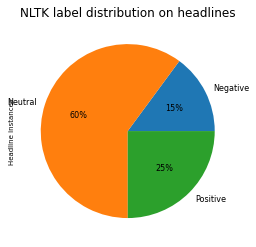

In [78]:
def label_function(val):
    return f'{val:.0f}%'

df_sub.groupby('NLTK_label').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
#                                 colors=['tomato', 'gold', 'skyblue'],
                                title='NLTK label distribution on headlines'
                               )

plt.ylabel('Headline instances', size=7);

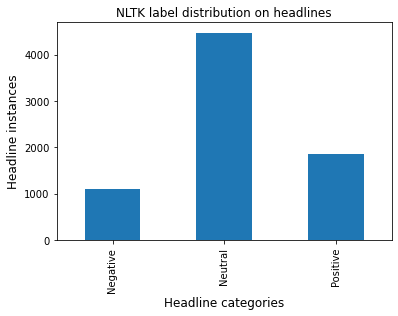

In [79]:
df_sub.groupby('NLTK_label').size().plot(kind='bar',
                                    title='NLTK label distribution on headlines'
                                   )

plt.ylabel('Headline instances', size=12)
plt.xlabel('Headline categories', size=12);

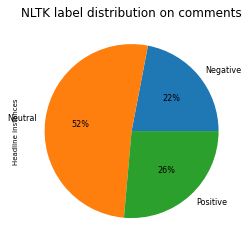

In [80]:
def label_function(val):
    return f'{val:.0f}%'

df_com.groupby('NLTK_label').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
#                                 colors=['tomato', 'gold', 'skyblue'],
                                title='NLTK label distribution on comments'
                               )

plt.ylabel('Headline instances', size=7);

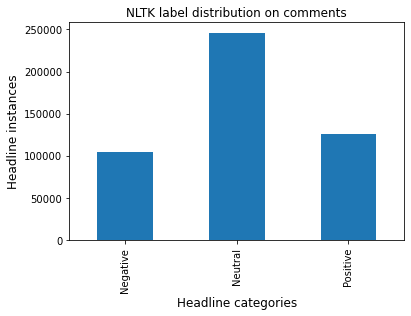

In [81]:
df_com.groupby('NLTK_label').size().plot(kind='bar',
                                    title='NLTK label distribution on comments'
                                   )

plt.ylabel('Headline instances', size=12)
plt.xlabel('Headline categories', size=12);

# Sentiments analysis of headlines/comments using VADER

# Save updated dataframes

In [117]:
output_posts = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\downloaded data\summaries\posts\\'
df_sub.to_csv(output_posts+'UpdatedSubmissions.csv', 
                      index=False
                     )

In [118]:
output_comments = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\downloaded data\summaries\comments\\'
df_com.to_csv(output_comments+'UpdatedComments.csv', 
                   index=False
                  )